In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [115]:
data = []

file = open("costs2.txt", "r")
for line in file:
    data.append(int(line))
file.close()

In [116]:

print(len(data))

919


In [117]:
print(f"Min: {min(data)}")
print(f"Max: {max(data)}")
print(f"Mean: {sum(data) / len(data)}")
print(f"Mode: {sorted(data)[int(len(data) / 2)]}")
print()
print(f"Optimal configuration: 20")

Min: 3661
Max: 84811
Mean: 29861.86398258977
Mode: 28629

Optimal configuration: 20


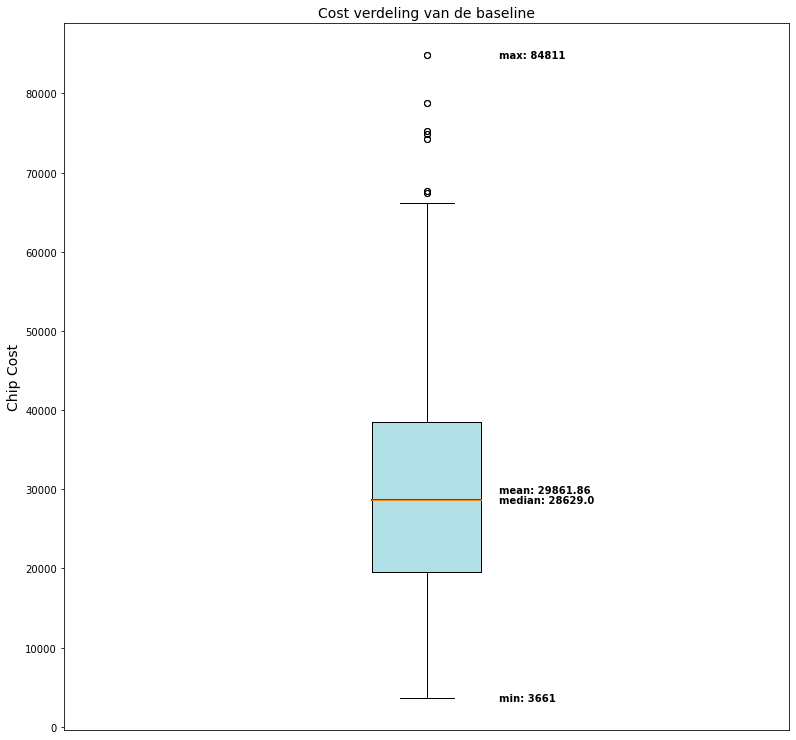

In [118]:

# Maak de boxplot
fig = plt.figure(figsize=(13, 13))
fig = plt.boxplot(data, patch_artist=True, boxprops=dict(facecolor='powderblue'), medianprops=dict(linewidth=2, color='red'))
 
# Bereken de relevante statistieken
stats = {'min': np.min(data), 'max': np.max(data), 'mean': round(np.mean(data), 2), 'median': np.median(data)}

# Voeg text annotaties toe voor de statistieken
for stat, value in stats.items():
    plt.text(1.1, value, f'{stat}: {value}', va='center', fontweight='bold')
    

# Verwijder x-as ticks en tick labels
plt.tick_params(axis='x', bottom=False, labelbottom=False)

# Voeg een titel en label toe aan de boxplot
plt.title('Cost verdeling van de baseline',fontsize=14)
plt.ylabel('Chip Cost', fontsize=14)

# Maak de plot
plt.boxplot(data)
 
plt.show()

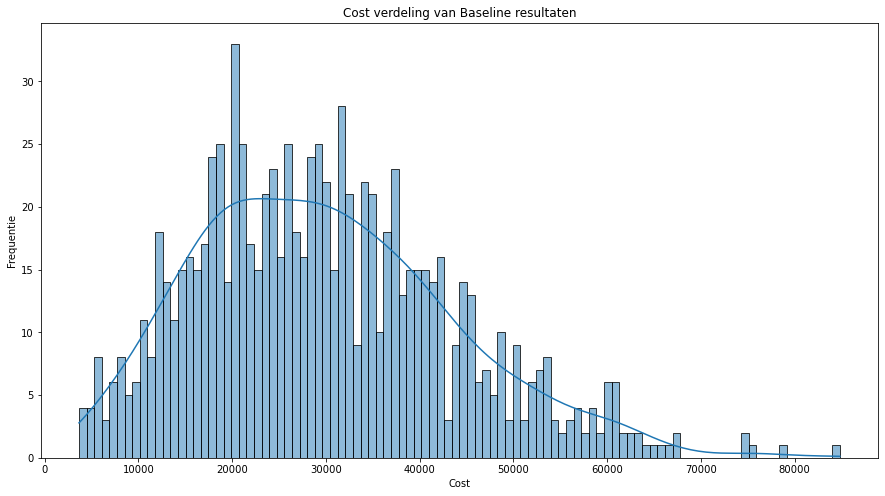

In [119]:
import seaborn as sns

# Maak het histogram
plt.figure(figsize=(15,8))
sns.histplot(data, kde=True, bins=100)

# Voeg labels toe
plt.xlabel('Cost')
plt.ylabel('Frequentie')
plt.title('Cost verdeling van Baseline resultaten')

plt.show()

In [120]:
np.mean(data)

29861.86398258977

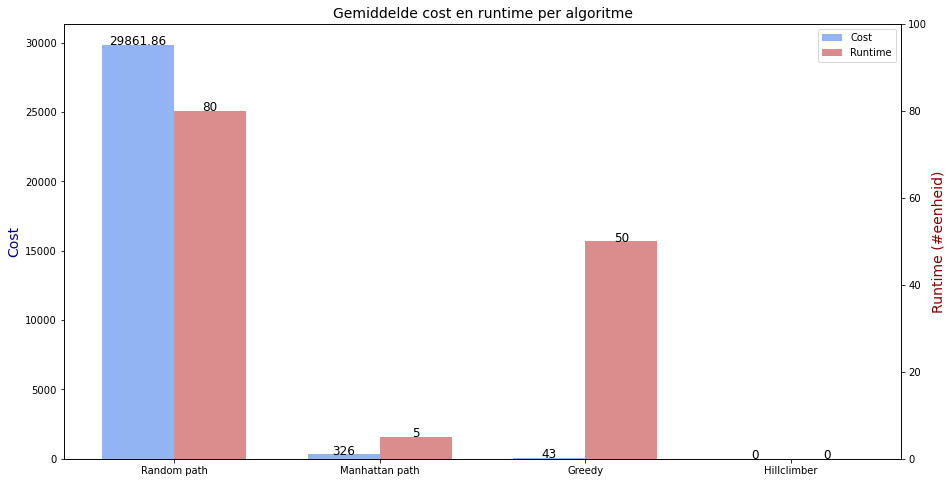

In [121]:
# Data
algorithms = ['Random path', 'Manhattan path', 'Greedy', 'Hillclimber']
cost = [round(np.mean(data), 2), 326, 43, 0]
runtime = [80, 5, 50, 0]

bar_width = 0.35

# Bereken x-as posities voor de bars
x = np.arange(len(algorithms))

# Maak het figuur en de assen
fig, ax1 = plt.subplots(figsize=(15,8))

# Voeg de cost staaf toe
bar1 = ax1.bar(x - bar_width/2, cost, width=bar_width, color='cornflowerblue', alpha=0.7)

# Voeg de cost y-as toe
ax1.set_ylabel('Cost', color='darkblue', fontsize=14)

# Voeg een tweede y-as toe
ax2 = ax1.twinx()
ax2.set_ylabel('Runtime (#eenheid)', color='darkred', fontsize=14)
ax2.set_ylim([0, 100])

# Voeg de runtime staaf toe
bar2 = ax2.bar(x + bar_width/2, runtime, width=bar_width, color='indianred', alpha=0.7)


# Voeg de x-as ticks en labels toe
ax1.set_xticks(x)
ax1.set_xticklabels(categories)


# Schrijf de cost waardes boven de staven
for i, value in enumerate(cost):
    ax1.text(i - bar_width/2, value + 0.4, str(value), ha="center", fontsize=12)

# Schrijf de runtime waardes boven de staven
for i, value in enumerate(runtime):
    ax2.text(i + bar_width/2, value + 0.001, str(value), ha="center", fontsize=12)

    
# Voeg een titel en legenda toe
plt.title('Gemiddelde cost en runtime per algoritme',fontsize=14)
ax1.legend([bar1, bar2], ['Cost', 'Runtime'])

plt.show()